[<img src="http://www.primaryobjects.com/images/digitrecognition1.jpg" align="right">](http://www.primaryobjects.com/2014/01/09/classifying-handwritten-digits-with-machine-learning/)
# Classification with the MNIST dataset.

[mldata.org](http://mldata.org/) is a public repository for machine learning data, supported by the [PASCAL network](http://www.pascal-network.org/).

The sklearn.datasets package is able to directly download data sets from the repository using the function [sklearn.datasets.fetch_mldata](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_mldata.html#sklearn.datasets.fetch_mldata).

The [MNIST database](https://en.wikipedia.org/wiki/MNIST_database) contains a total of 70000 examples of handwritten digits of size 28x28 pixels, labeled from 0 to 9.

In [1]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

## Load data and preprocessing

In [2]:
from sklearn.datasets import fetch_mldata
ds = fetch_mldata('MNIST original', data_home='./data')

In [3]:
X = ds.data
y = ds.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [4]:
# Don't cheat - fit only on training data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

/Users/ei1028/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


## Build the model and train

In [5]:
net = MLPClassifier(solver='sgd',\
                    hidden_layer_sizes=(50, ),\
                    max_iter=4000)

In [6]:
net.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=4000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

## Analysis of the network

### Classification report

In [7]:
expected = y_test
predicted = net.predict(X_test)
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98       980
        1.0       0.99      0.99      0.99      1135
        2.0       0.97      0.95      0.96      1032
        3.0       0.96      0.97      0.97      1010
        4.0       0.97      0.97      0.97       982
        5.0       0.96      0.96      0.96       892
        6.0       0.97      0.97      0.97       958
        7.0       0.97      0.97      0.97      1028
        8.0       0.96      0.96      0.96       974
        9.0       0.97      0.96      0.96      1009

avg / total       0.97      0.97      0.97     10000



### Confusion matrix

In [8]:
print(metrics.confusion_matrix(expected, predicted))

[[ 966    1    2    1    1    2    4    2    1    0]
 [   0 1124    4    1    0    1    1    1    3    0]
 [   8    4  984   10    3    0    4    8   10    1]
 [   0    0    3  982    0   13    0    5    6    1]
 [   0    0    5    2  954    0    7    1    3   10]
 [   2    0    1   12    2  857    7    2    4    5]
 [   6    2    1    1    8    8  930    0    2    0]
 [   1    4    8    4    1    2    0  996    3    9]
 [   4    0    7    4    5    7    3    5  936    3]
 [   3    4    0    8   10    6    0    6    7  965]]


### Loss curve

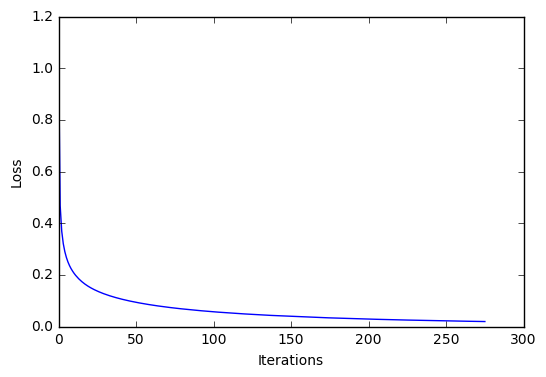

In [9]:
plt.plot(net.loss_curve_);
plt.xlabel('Iterations');
plt.ylabel('Loss');